## VODAFONE CUSTOMER CHURN ANALYSIS - TEAM PRETORIA - LP2

**Data Understanding**

This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

 - customerID: unique identifier for each customer
 - gender: customer gender (Male/Female)
 - SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
 - Partner: indicates if the customer has a partner or not (Yes, No)
 - Dependents: indicates if the customer has dependents or not (Yes, No)
 - tenure: number of months the customer has stayed with the company
 - PhoneService: indicates if the customer has a phone service or not (Yes, No)
 - MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
 - InternetService: type of internet service the customer has (DSL, Fiber optic, No)
 - OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
 - DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
 - TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
 - StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
 - StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
 - Contract: type of contract the customer has (Month-to-month, One year, Two year)
 - PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
 - PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
 - MonthlyCharges: amount charged to the customer monthly
 - TotalCharges: total amount charged to the customer
 - Churn: indicates if the customer has churned or not (Yes, No)

#### SETUP

##### INSTALLING RELEVAT LIBRARIES


%pip install database interaction library
%pip install pyodbc
%pip install plotly
%pip install statsmodels
%pip install imblearn 
%pip install openpyxl
%pip install phik
%pip install xgboost

In [1]:
#%pip install tabulate
#%pip install python-dotenv

#### IMPORTATION OF LIBRARIES 

In [2]:
##Data Handling
import pandas as pd
import numpy as np
import pyodbc
import statsmodels.api as sm

##Visualization Libraries 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
import random
import plotly.offline as offline
offline.init_notebook_mode(connected=True) # Configure Plotly to run offline


# Feature Processing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import phik
from phik.report import plot_correlation_matrix
from phik import report

#Algorithms libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
import xgboost

##pipelines and transformers 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display="diagram")

##handling imbalance datasets
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

##hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

##for hypothesis testing 
from scipy.stats import chi2_contingency

##model evaluation:
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Other packages
from tabulate import tabulate
from dotenv import dotenv_values
import os
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
import pickle

## DATA LOADING

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
SERVER = 'dap-projects-database.database.windows.net'
DATABASE = 'dapDB'
USERNAME = 'dataAnalyst_LP2'
PASSWORD = 'A3g@3kR$2y'

#Establish connection with server 
connection_string = f"DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}"

In [4]:
#Connecting to the Server
connection = pyodbc.connect(connection_string)

In [5]:
#Get data from server with query 'Select *'
query = "Select * from dbo.LP2_Telco_churn_first_3000"
sql_data = pd.read_sql(query, connection)

In [6]:
sql_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
sql_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
#read csv for remaining data from GitHub repository
data = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
onedrive_data = pd.read_excel('Telco-churn-second-2000.xlsx')


In [10]:
#Merge dataset
voda_churn_train = pd.concat([sql_data, data])
voda_churn_train.to_csv('voda_customer_churn.csv')

#### EXPLORATORY DATA ANALYSIS 

Null Hypothesis: Customers with high monthly charges do not have the tendency to churn 

Alt Hypothesis: Customers with high monthly Charges have the tendency to churn 


Questions 
- How much total charges and Monthly charges did churners generate? 
- Are customers with dependents likely to have higher charges than those without dependents?
- How many Senior Citizens with dependents churn?
- Which internet service is most preferred?
- What is the most common payment method?

In [11]:
voda_df = pd.read_csv('voda_customer_churn.csv')

In [12]:
voda_df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


In [13]:
voda_df.shape

(5043, 22)

In [14]:
voda_df = voda_df.drop('Unnamed: 0', axis = 'columns')

In [15]:
voda_df.shape

(5043, 21)

In [16]:
voda_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [17]:
#Checking the data types of the columns
voda_df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
voda_df.describe()

,tenure,MonthlyCharges
count,5043.000000,5043.000000
mean,32.576641,65.090214
std,24.529807,30.068133
min,0.000000,18.400000
25%,9.000000,35.775000
50%,29.000000,70.550003
75%,56.000000,90.050003
max,72.000000,118.650002


75% customers have tenure less than 56 months

Average Monthly charges are USD 65.09 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.0, 'Count of Target Variable per Category')

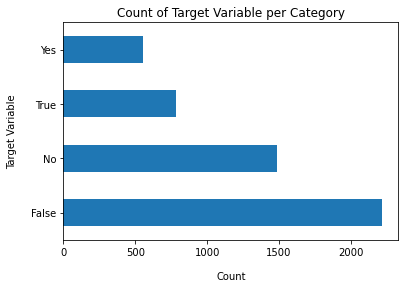

In [19]:
voda_df['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per Category")

In [20]:
voda_df['Churn'].value_counts()

False    2219
No       1487
True      780
Yes       556
Name: Churn, dtype: int64

* The total value count is less than expected. Possibly missing values. Will be looked at during cleaning.
* Nonetheless, data looks highly imbalanced
* So we analyse the data with other features while taking the target values separately to get some insights.

In [21]:
# To have a concise look at the dataframe we will use verbose = True mode
voda_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


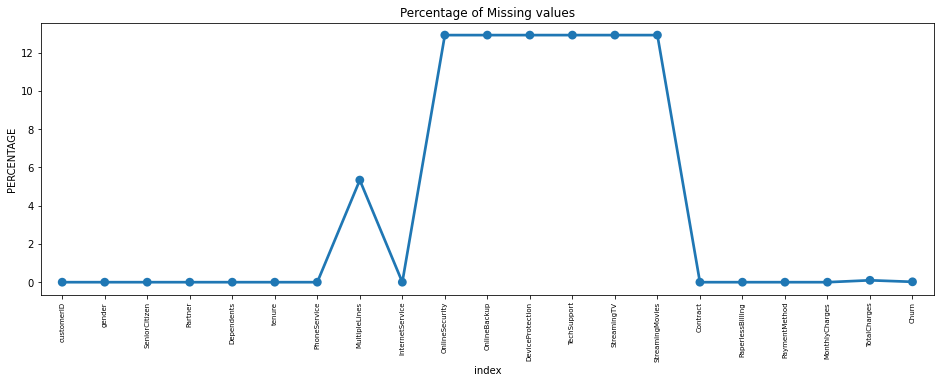

In [22]:
missing = pd.DataFrame((voda_df.isnull().sum())*100/voda_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

A point plot presentation of missing values in percentage shows our target variable has about 25% values missing. We would have to look at that in data cleaning

### Missing Data - Initial Intuition

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

#### Cleaning of Train Data

**1.** Create a copy of base data for manupulation & processing

In [23]:
voda_data = voda_df.copy()

**2** From Data understanding above we realized that Total Charges is object and needs to be changed to numeric

In [24]:
voda_data.TotalCharges = pd.to_numeric(voda_data.TotalCharges, errors='coerce')
voda_data.isnull().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

**3** As we can see, there are 8 missing values in TotalCharges Column. Let us have a look at these records

In [25]:
voda_data.loc[voda_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,NaN,DSL,True,...,True,True,True,False,Two year,True,Bank transfer (automatic),52.549999,NaN,False
753,3115-CZMZD,Male,False,False,True,0,True,False,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Mailed check,20.250000,NaN,False
936,5709-LVOEQ,Female,False,True,True,0,True,False,DSL,True,...,True,False,True,True,Two year,False,Mailed check,80.849998,NaN,False
1082,4367-NUYAO,Male,False,True,True,0,True,True,No,NaN,...,NaN,NaN,NaN,NaN,Two year,False,Mailed check,25.750000,NaN,False
1340,1371-DWPAZ,Female,False,True,True,0,False,NaN,DSL,True,...,True,True,True,False,Two year,False,Credit card (automatic),56.049999,NaN,False
3218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700000,NaN,No
4670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
4754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


**4** We would fill the missing values in the TotalCharges Column with the mean

In [26]:
voda_data['TotalCharges'].fillna(value= voda_data["TotalCharges"].mean(), inplace= True)S

**5** We would fill the missing values in the Churn Column with the mode

In [27]:
voda_data['Churn'].fillna(voda_data["Churn"].mode()[0], inplace= True)

**6** We are going to categorized the customers base on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [28]:
#Get the max tenure
print(voda_data['tenure'].max())

72


In [29]:
#Group tenure in basket of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

voda_data['tenure_group'] = pd.cut(voda_data.tenure, range(1,84,12), right=False, labels=labels)

In [30]:
#View basket
voda_data['tenure_group'].value_counts()

1 - 12     1534
61 - 72    1017
13 - 24     732
25 - 36     603
49 - 60     590
37 - 48     559
Name: tenure_group, dtype: int64

**7** Drop columns not required for processing

In [31]:
#Drop the column CustomerID and tenure
voda_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
voda_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,False,True,False,False,NaN,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False,1 - 12
1,Male,False,False,False,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False,25 - 36
2,Male,False,False,False,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True,1 - 12
3,Male,False,False,False,False,NaN,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,37 - 48
4,Female,False,False,False,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True,1 - 12


**8** Unifying the Churn Column Values

In [32]:
#Churn Column
voda_data['Churn'] = voda_data['Churn'].str.replace('False', 'No')
voda_data['Churn'] = voda_data['Churn'].str.replace('True', 'Yes')

#Senior Citizen Column 
voda_data['SeniorCitizen'] = voda_data['SeniorCitizen'].str.replace( '0','False')
voda_data['SeniorCitizen'] = voda_data['SeniorCitizen'].str.replace('1','True')

#Partner Column 
voda_data['Partner'] = voda_data['Partner'].str.replace('False', 'No')
voda_data['Partner'] = voda_data['Partner'].str.replace('True', 'Yes')

#Online Security 
voda_data['OnlineSecurity'] = voda_data['OnlineSecurity'].str.replace('False', 'No')
voda_data['OnlineSecurity'] = voda_data['OnlineSecurity'].str.replace('True', 'Yes')

#Dependents Column
voda_data['Dependents'] = voda_data['Dependents'].str.replace('False', 'No')
voda_data['Dependents'] = voda_data['Dependents'].str.replace('True', 'Yes')

#PhoneService Column
voda_data['PhoneService'] = voda_data['PhoneService'].str.replace('False', 'No')
voda_data['PhoneService'] = voda_data['PhoneService'].str.replace('True', 'Yes')

#MultipleLines Column
voda_data['MultipleLines'] = voda_data['MultipleLines'].str.replace('False', 'No')
voda_data['MultipleLines'] = voda_data['MultipleLines'].str.replace('True', 'Yes')

#Online Backup 
voda_data['OnlineBackup'] = voda_data['OnlineBackup'].str.replace('False', 'No')
voda_data['OnlineBackup'] = voda_data['OnlineBackup'].str.replace('True', 'Yes')

#DeviceProtection
voda_data['DeviceProtection'] = voda_data['DeviceProtection'].str.replace('False', 'No')
voda_data['DeviceProtection'] = voda_data['DeviceProtection'].str.replace('True', 'Yes')

#TechSupport
voda_data['TechSupport'] = voda_data['TechSupport'].str.replace('False', 'No')
voda_data['TechSupport'] = voda_data['TechSupport'].str.replace('True', 'Yes')

#TechSupport
voda_data['TechSupport'] = voda_data['TechSupport'].str.replace('False', 'No')
voda_data['TechSupport'] = voda_data['TechSupport'].str.replace('True', 'Yes')

#StreamingTV
voda_data['StreamingTV'] = voda_data['StreamingTV'].str.replace('False', 'No')
voda_data['StreamingTV'] = voda_data['StreamingTV'].str.replace('True', 'Yes')

#StreamingMovies
voda_data['StreamingMovies'] = voda_data['StreamingMovies'].str.replace('False', 'No')
voda_data['StreamingMovies'] = voda_data['StreamingMovies'].str.replace('True', 'Yes')

#PaperlessBilling
voda_data['PaperlessBilling'] = voda_data['PaperlessBilling'].str.replace('False', 'No')
voda_data['PaperlessBilling'] = voda_data['PaperlessBilling'].str.replace('True', 'Yes')

#### Cleaning of Test Data

**1.** Create a copy of base data for manupulation & processing

In [33]:
onedrive_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [34]:
onedrive_df = onedrive_data.copy()

**2** Checking for missing values

In [35]:
onedrive_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

From Data understanding above, we realized that there are no missing values

**3** We are going to categorized the customers base on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [36]:
#Get the max tenure
print(onedrive_df['tenure'].max())

72


In [37]:
#Group tenure in basket of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

onedrive_df['tenure_group'] = pd.cut(onedrive_df.tenure, range(1,84,12), right=False, labels=labels)

In [38]:
#View basket
onedrive_df['tenure_group'].value_counts()

1 - 12     641
61 - 72    390
13 - 24    292
49 - 60    242
25 - 36    229
37 - 48    203
Name: tenure_group, dtype: int64

**4** Drop columns not required for processing

In [39]:
#Drop the column CustomerID and tenure
onedrive_df.drop(columns=['customerID','tenure'],axis=1,inplace=True)
onedrive_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,1 - 12
1,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,1 - 12
2,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,25 - 36
3,Male,0,No,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,25 - 36
4,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,1 - 12


**5** Unifying the Churn Column Values

In [40]:
#Partner Column 
onedrive_df['Partner'] = onedrive_df['Partner'].str.replace('False', 'No')
onedrive_df['Partner'] = onedrive_df['Partner'].str.replace('True', 'Yes')

#Online Security 
onedrive_df['OnlineSecurity'] = onedrive_df['OnlineSecurity'].str.replace('False', 'No')
onedrive_df['OnlineSecurity'] = onedrive_df['OnlineSecurity'].str.replace('True', 'Yes')

#Dependents Column
onedrive_df['Dependents'] = onedrive_df['Dependents'].str.replace('False', 'No')
onedrive_df['Dependents'] = onedrive_df['Dependents'].str.replace('True', 'Yes')

#PhoneService Column
onedrive_df['PhoneService'] = onedrive_df['PhoneService'].str.replace('False', 'No')
onedrive_df['PhoneService'] = onedrive_df['PhoneService'].str.replace('True', 'Yes')

#MultipleLines Column
onedrive_df['MultipleLines'] = onedrive_df['MultipleLines'].str.replace('False', 'No')
onedrive_df['MultipleLines'] = onedrive_df['MultipleLines'].str.replace('True', 'Yes')

#Online Backup 
onedrive_df['OnlineBackup'] = onedrive_df['OnlineBackup'].str.replace('False', 'No')
onedrive_df['OnlineBackup'] = onedrive_df['OnlineBackup'].str.replace('True', 'Yes')

#DeviceProtection
onedrive_df['DeviceProtection'] = onedrive_df['DeviceProtection'].str.replace('False', 'No')
onedrive_df['DeviceProtection'] = onedrive_df['DeviceProtection'].str.replace('True', 'Yes')

#TechSupport
onedrive_df['TechSupport'] = onedrive_df['TechSupport'].str.replace('False', 'No')
onedrive_df['TechSupport'] = onedrive_df['TechSupport'].str.replace('True', 'Yes')

#TechSupport
onedrive_df['TechSupport'] = onedrive_df['TechSupport'].str.replace('False', 'No')
onedrive_df['TechSupport'] = onedrive_df['TechSupport'].str.replace('True', 'Yes')

#StreamingTV
onedrive_df['StreamingTV'] = onedrive_df['StreamingTV'].str.replace('False', 'No')
onedrive_df['StreamingTV'] = onedrive_df['StreamingTV'].str.replace('True', 'Yes')

#StreamingMovies
onedrive_df['StreamingMovies'] = onedrive_df['StreamingMovies'].str.replace('False', 'No')
onedrive_df['StreamingMovies'] = onedrive_df['StreamingMovies'].str.replace('True', 'Yes')

#PaperlessBilling
onedrive_df['PaperlessBilling'] = onedrive_df['PaperlessBilling'].str.replace('False', 'No')
onedrive_df['PaperlessBilling'] = onedrive_df['PaperlessBilling'].str.replace('True', 'Yes')

## Data Exploration

**1** Plot of individual predictors by churn

### Univariate Analysis

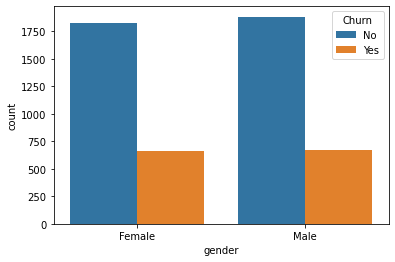

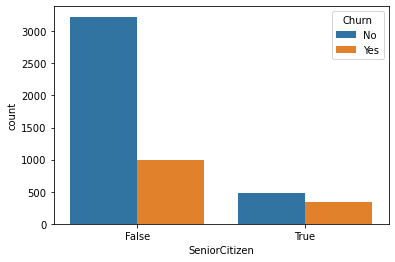

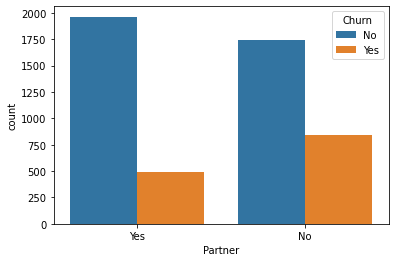

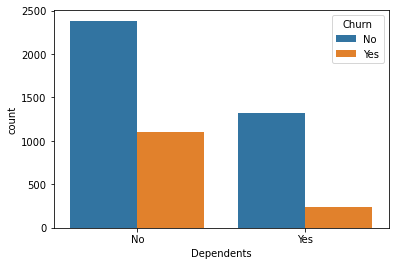

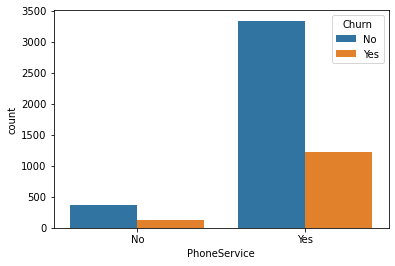

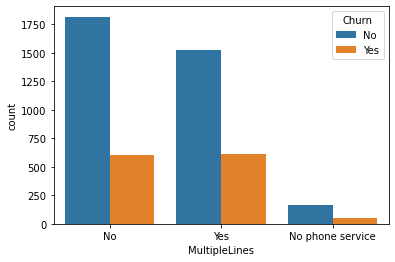

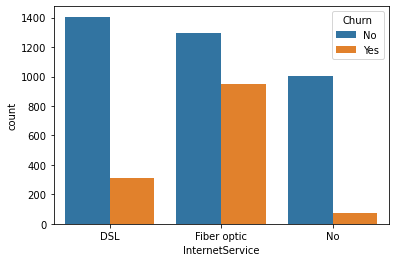

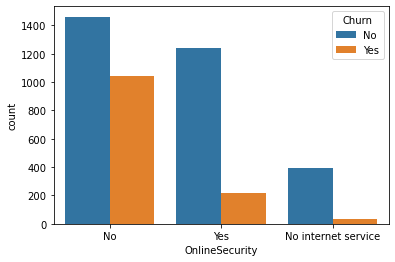

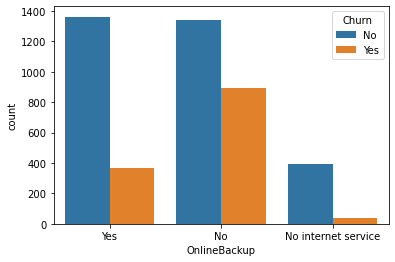

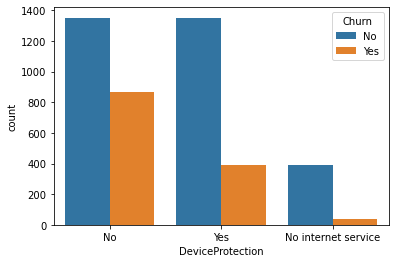

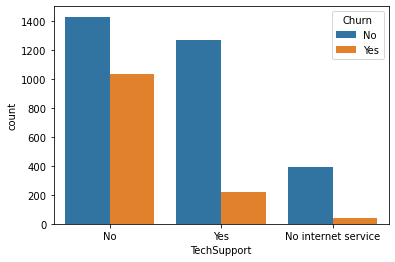

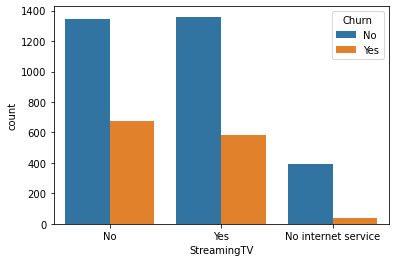

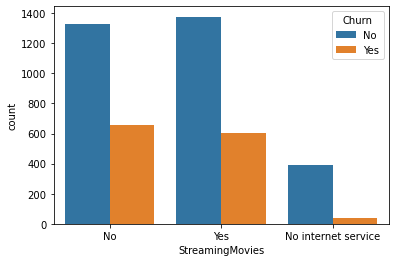

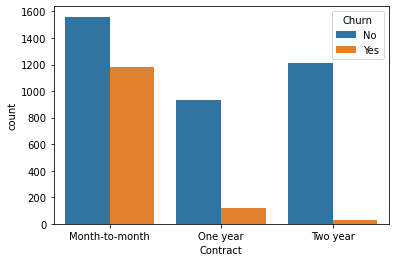

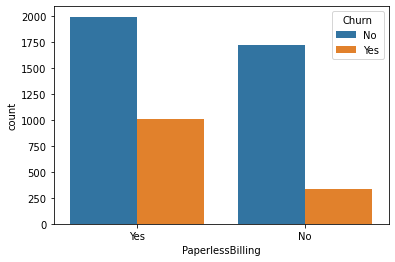

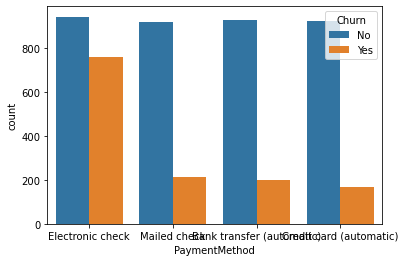

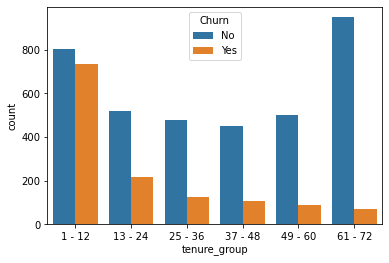

In [41]:
for i, predictor in enumerate(voda_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=voda_data, x=predictor, hue='Churn')

**2** Relationship between Monthly Charges and Total Charges

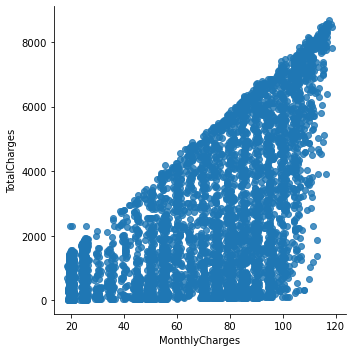

In [42]:
sns.lmplot(data=voda_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

It could be observed that as Total Charges increases, Monthly Charges increases as expected

**3** Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

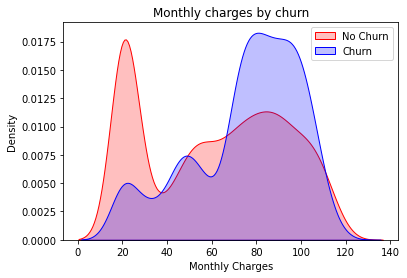

In [43]:
Mth = sns.kdeplot(voda_data.MonthlyCharges[(voda_data["Churn"] == "No") ],
                color="Red", shade = True)
Mth = sns.kdeplot(voda_data.MonthlyCharges[(voda_data["Churn"] == "Yes") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**Insight:** Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

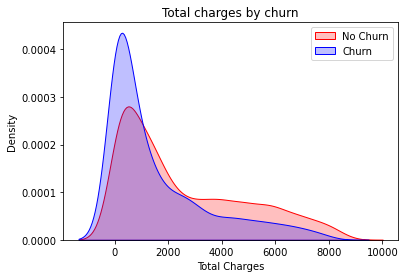

In [44]:
Tot = sns.kdeplot(voda_data.TotalCharges[(voda_data["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(voda_data.TotalCharges[(voda_data["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** Higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

### Bivariate Analysis

In [45]:
new_df1_target0 = voda_data.loc[voda_data["Churn"] == "No"]
new_df1_target1 = voda_data.loc[voda_data["Churn"] == "Yes"]

In [46]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

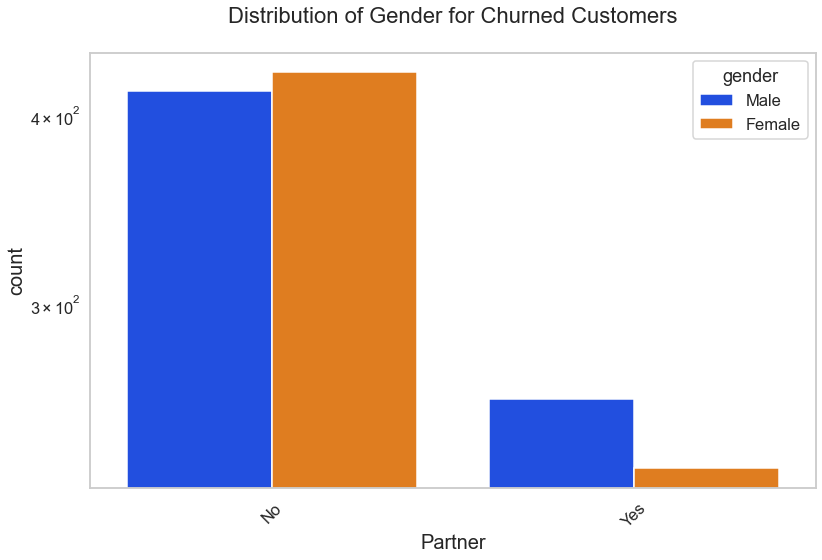

In [47]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

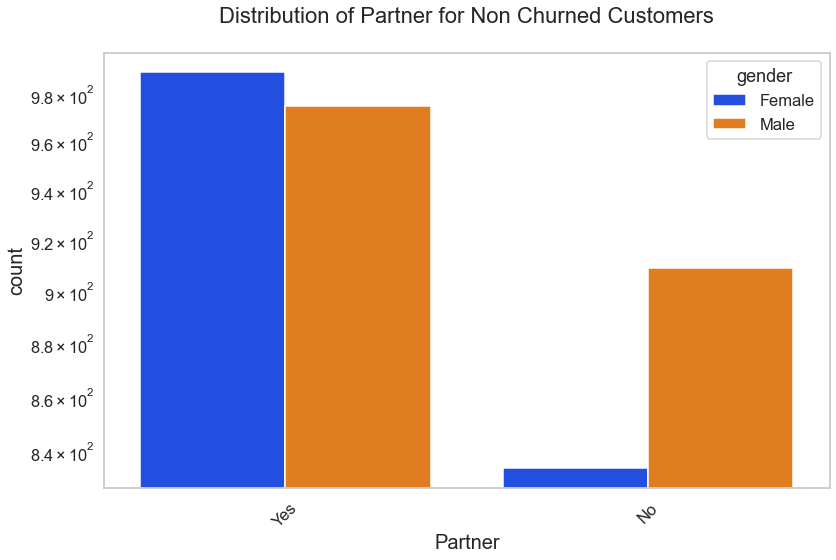

In [48]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Partner for Non Churned Customers',hue='gender')

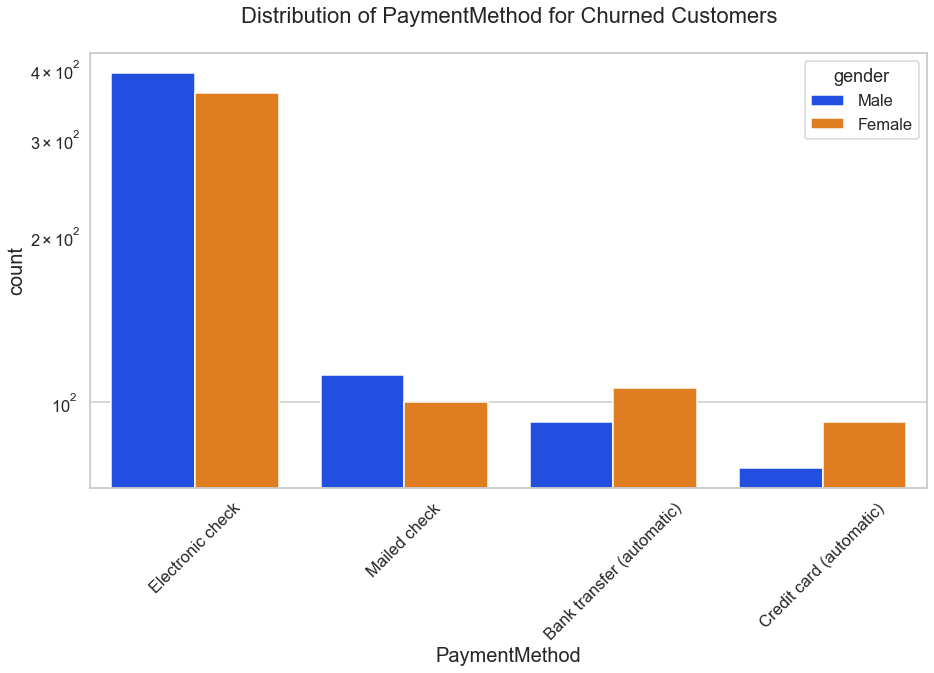

In [49]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

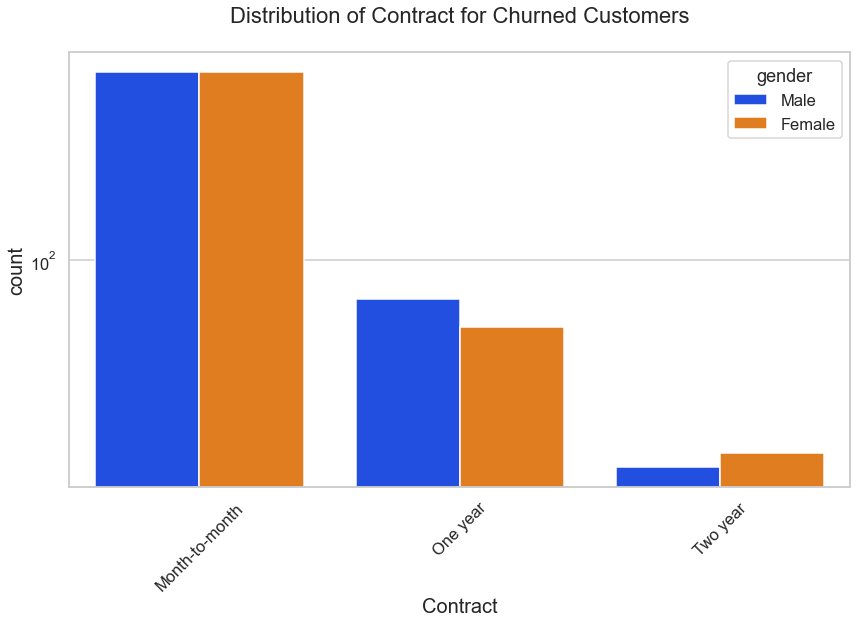

In [50]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

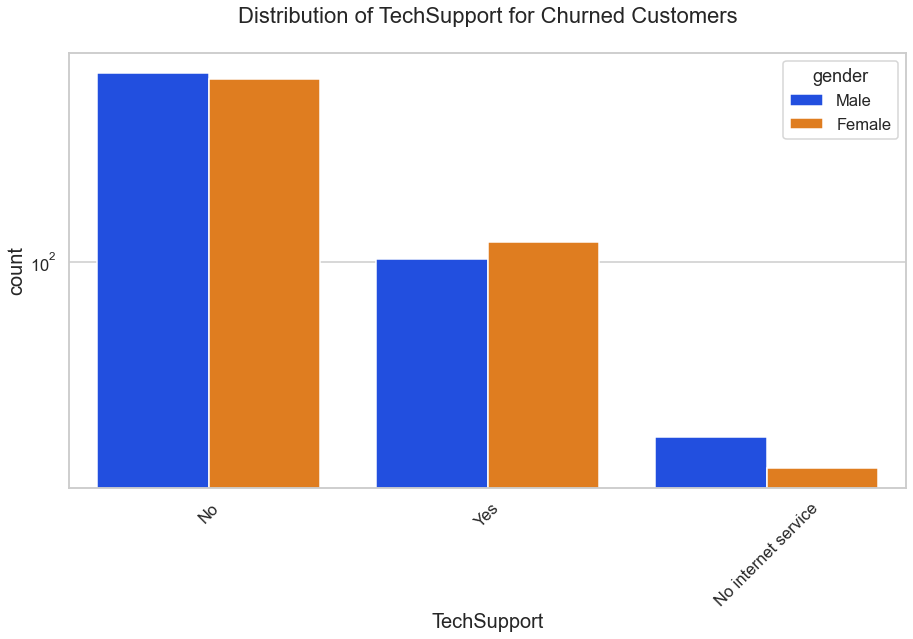

In [51]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

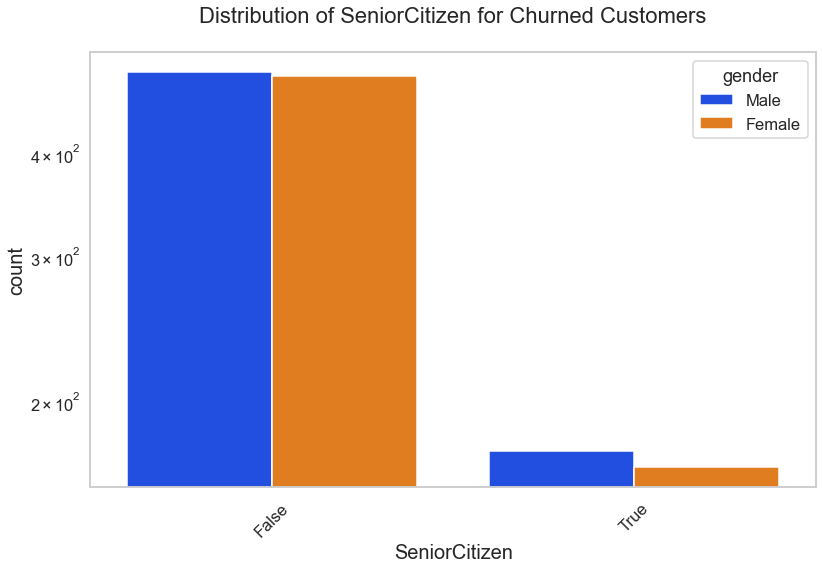

In [52]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSIONS FROM EDA

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

# Hypothesis Testing

Null Hypothesis: Customers with high monthly charges do not have the tendency to churn 

Alt Hypothesis: Customers with high monthly Charges have the tendency to churn

In [53]:
# Creating a contingency table
contingency_table = pd.crosstab(voda_data['MonthlyCharges'], voda_data['Churn'])

# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is no significant relationship between high monthly charges  and churn.")
else:
    print("Fail to reject the null hypothesis. There is a significant relationship between high monthly charges and churn.")

Chi-square statistic: 2435.9382488559727
P-value: 2.9228176168391307e-08
Degrees of freedom: 2068
Expected frequencies: [[0.73507833 0.26492167]
 [0.73507833 0.26492167]
 [0.73507833 0.26492167]
 ...
 [0.73507833 0.26492167]
 [0.73507833 0.26492167]
 [0.73507833 0.26492167]]
Reject the null hypothesis. There is no significant relationship between high monthly charges  and churn.


The chi2 statistic measures the degree of association between the variables (MonthlyCharges and Churn)

To a high extent,the p-value is small (0.00) as compared to  the significance level of 0.05, we reject the null hypothesis. This  suggests that there is a strong association between high Monthly Charges and Churn. The results give an indication that high monthly charges has an impact on the likelihood of customers  to churn.

### Saving datasets to CSV

In [54]:
voda_data.to_csv('train.csv')

In [55]:
onedrive_df.to_csv('test.csv')

### ANSWERING ANALYTICAL QUESTIONS 

#### 1. How much revenue did churners generate?

In [56]:
churn_df= voda_data[voda_data["Churn"]== "Yes"]
amount = churn_df.agg({"MonthlyCharges": "sum", "TotalCharges": "sum"}).reset_index()

amount.columns = ["Charge", "Amount"]

fig = px.bar(data_frame= amount, x= "Charge",
       y= "Amount", title= "Revenue Generated By Churners", text= "Amount", color= "Charge",
             color_discrete_sequence= ["red", "blue"])
fig.show()

Here we can see that Churners Generate a monthly revenue of Ghc 100,481.90 and a Total Revenue of Ghc 2,092,874.25

#### 2. Are customers with dependents likely to have higher charges than those with dependents?

In [57]:
# Group Customers with Dependency and total charges
cus_depdts = px.box(data_frame=voda_df, x='Dependents', y='TotalCharges', color='Dependents',
             category_orders={'Dependents': ['No', 'Yes']})
cus_depdts.update_layout(title='Distribution of Total Charges by Dependents Status',
                  xaxis_title='Dependents', yaxis_title='Total Charges')
cus_depdts.show()

From the Boxplot we can see that people with dependants have incure higher charges with an average charge of Ghc 1,601.25 than people without dependents with average charge of Ghc 1,322.5

#### 3. How many senior citizens with dependents churn?

In [58]:
Senior_dept = voda_data[(voda_data["Churn"]== "Yes")&(voda_data["Dependents"]== "Yes")]
snrc_dep = px.histogram(x="SeniorCitizen", data_frame=Senior_dept, color= "SeniorCitizen", color_discrete_sequence=["rosybrown", "plum"], 
             title= "Senior Citizen with Dependents Who Churned")
snrc_dep.show()

We realise that the number of Senior Citizen who have dependents are 237 and 16 of them Churn. 

#### 4. Which Internet Service is most preferred?

In [59]:
#Group customer ID by internet services 
inter_serv = voda_data.groupby('InternetService')['gender'].count().reset_index()
inter_serv.rename(columns={'gender':'Count'}, inplace =True)
inter_serv

,InternetService,Count
0,DSL,1715
1,Fiber optic,2248
2,No,1080


In [60]:
#Visualizing 
count_inter_serv = inter_serv['Count']
Product = inter_serv['InternetService']

fig = px.pie(values=count_inter_serv, names=Product, title='Most Preferred InternetService ', 
             color_discrete_sequence=px.colors.sequential.Redor, 
             labels={'value': 'Count'})

fig.update_traces(textposition='inside', textinfo='percent+label') 
fig.show()

The most preferred internet Service is Fiber Optic

#### 5. What is the most common payment method?

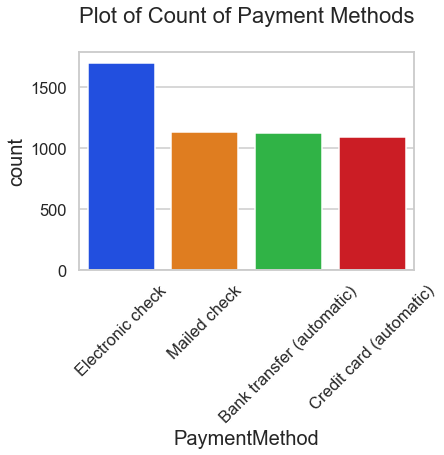

<Figure size 720x360 with 0 Axes>

In [61]:
sns.countplot(x = "PaymentMethod", data = voda_data, palette= "bright"  )
plt.title("Plot of Count of Payment Methods")
plt.xticks(rotation= 45)
plt.figure(figsize= (10,5))
plt.show()

According to our Bargraph we can deduce that the most common Payment method is Electronic Check

## MODELING

# Feature Engineering

#### Reading csv

In [62]:
train_data=pd.read_csv("train.csv")

In [63]:
train_data=train_data.drop('Unnamed: 0',axis=1)

### Step 1: Data Splitting

In [64]:
X=train_data.drop('Churn',axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,Female,False,Yes,No,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,1 - 12
1,Male,False,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,25 - 36
2,Male,False,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,1 - 12
3,Male,False,No,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,37 - 48
4,Female,False,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,False,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,13 - 24
5039,Female,False,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,61 - 72
5040,Female,False,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,1 - 12
5041,Male,True,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,1 - 12


In [65]:
y=train_data['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: Churn, Length: 5043, dtype: object

In [152]:
y.value_counts()

No     3707
Yes    1336
Name: Churn, dtype: int64

In [66]:
# Declaring variables/ attributes to be used for our pipelines

NUMERICAL = list(set(X.select_dtypes('number').columns))

print(f"Numerical features: {', '.join(NUMERICAL)}")

CATEGORICAL = list(set(X.select_dtypes(exclude= 'number').columns))

print(f"Categorical features: {', '.join(CATEGORICAL)}")

Numerical features: MonthlyCharges, TotalCharges
Categorical features: MultipleLines, InternetService, StreamingMovies, DeviceProtection, SeniorCitizen, gender, OnlineSecurity, PaperlessBilling, OnlineBackup, Partner, Contract, PaymentMethod, PhoneService, StreamingTV, TechSupport, tenure_group, Dependents


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [68]:
###converting our label to a numeric variable for easy analysis 

LE= LabelEncoder() ##initializing the model


num_y_train= LE.fit_transform(y_train) ##fitting and transforming on the train data

num_y_test= LE.transform(y_test) ##transforming on the test data

In [69]:
y_train = num_y_train

y_test = num_y_test

In [70]:
### handling the empty space. The aim of the this function is to replace the missing values with NaN values

def remove_space(in_train_data):
    in_train_data["TotalCharges"]= in_train_data["TotalCharges"].replace(r"^\s*$", np.nan, regex= True)
    return in_train_data

In [71]:
"""Since we cannot fit and transform the function above, we will create a class with the function embedded to help 

us call, fit, and transform with the function above"""

class SpaceImputer():
    def __init__(self,func):
        self.func= func
    
    def transform(self, in_train_data, **transform_params):
        return self.func(in_train_data)
    
    def fit(self, X, y=None, **fit_params):
        return self
        

## Model Building

### Creating Pipelines

In [72]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

In [73]:
preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipeline, NUMERICAL),
    ('cat', categorical_pipeline, CATEGORICAL)
])

### DecisionTree CLassifier

In [74]:
model_dt = Pipeline([
    ('spaceImputer', SpaceImputer(remove_space)),
    ('preprocessors', preprocessors),
    ('model', DecisionTreeClassifier(random_state = 100,max_depth=6, min_samples_leaf=8))
])

In [75]:
model_dt.fit(X_train, num_y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947FBDAF0>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=100))])

In [76]:
y_predict0 = model_dt.predict(X_test)
y_predict0

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
roc_auc0 = roc_auc_score(y_test ,y_predict0)
roc_auc0

0.7103713013719373

In [78]:
report = classification_report(y_test, y_predict0)

report += f"\nROC AUC Score: {roc_auc0:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       742
           1       0.58      0.57      0.57       267

    accuracy                           0.78      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.77      0.78      0.77      1009

ROC AUC Score: 0.7104


As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

Hence we check the ROC AUC score. measures the performance of a classification model based on the area under the ROC curve. It is a value between 0 and 1, with higher values indicating better model performance in distinguishing between positive and negative classes. From our populated score, we can see the score is quite low.

Furthermore, we need to check ROC AUC Score, recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

##### Decision Tree  Classifier with balancing

In [79]:
model_dt_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
                           ("model", DecisionTreeClassifier(random_state = 100, max_depth=6, min_samples_leaf=8))
                           ])

In [80]:
model_dt_smote.fit(X_train,y_train)

y_predict1 = model_dt_smote.predict(X_test)

roc_auc1 = roc_auc_score(y_test ,y_predict1)

report = classification_report(y_test, y_predict1)

report += f"\nROC AUC Score: {roc_auc1:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.89      0.78      0.83       742
           1       0.54      0.73      0.62       267

    accuracy                           0.77      1009
   macro avg       0.72      0.75      0.73      1009
weighted avg       0.80      0.77      0.78      1009

ROC AUC Score: 0.7535


### Insights
Adding balance improves the model

Increase in the **non-churner(1)** Recall means less false negatives.

It worth noting that while recall on non-churners increased, precision decreased. This is ok thanks to the precision-recall trade off

### Let us try other models and evaluate

#### Random Forest Classifier

In [81]:
model_rf = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("model", RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8))
                           ])

In [82]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947E77070>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=100))])

In [83]:
y_predict2 = model_rf.predict(X_test)

In [84]:
roc_auc2 = roc_auc_score(y_test, y_predict2)

In [85]:
report = classification_report(y_test, y_predict2)

report += f"\nROC AUC Score: {roc_auc2:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.88       742
           1       0.70      0.48      0.57       267

    accuracy                           0.81      1009
   macro avg       0.76      0.70      0.72      1009
weighted avg       0.80      0.81      0.80      1009

ROC AUC Score: 0.7038


#### Random Forest Classifier with Balancing

In [86]:
model_rf_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
                           ("model", RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100, max_depth=6, min_samples_leaf=8))
                           ])

In [87]:
model_rf_smote.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947FA3550>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=100))])

In [88]:
y_predict3 = model_rf_smote.predict(X_test)

In [89]:
roc_auc3 = roc_auc_score(y_test,y_predict3)

In [90]:
report = classification_report(y_test, y_predict3)

report += f"\nROC AUC Score: {roc_auc3:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       742
           1       0.53      0.76      0.62       267

    accuracy                           0.76      1009
   macro avg       0.71      0.76      0.72      1009
weighted avg       0.80      0.76      0.77      1009

ROC AUC Score: 0.7570


#### Logistic Regression

In [91]:
model_lr = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("model", LogisticRegression(C=1.0, random_state = 100))
                           ])

In [92]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947F59760>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('model', LogisticRegression(random_state=100))])

In [93]:
y_predict4 = model_lr.predict(X_test)

In [94]:
roc_auc4 = roc_auc_score(y_test, y_predict4)

In [95]:
report = classification_report(y_test, y_predict4)

report += f"\nROC AUC Score: {roc_auc4:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       742
           1       0.66      0.56      0.61       267

    accuracy                           0.81      1009
   macro avg       0.75      0.73      0.74      1009
weighted avg       0.80      0.81      0.80      1009

ROC AUC Score: 0.7283


#### Logistic Regression With Balancing

In [96]:
model_lr_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
                           ("model", LogisticRegression(C=1.0, random_state = 100))
                           ])

In [97]:
model_lr_smote.fit(X_train,y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947F2A340>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model', LogisticRegression(random_state=100))])

In [98]:
y_predict5 = model_lr_smote.predict(X_test)

In [99]:
roc_auc5 = roc_auc_score(y_test, y_predict5)

In [100]:
report = classification_report(y_test, y_predict5)

report += f"\nROC AUC Score: {roc_auc5:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.90      0.73      0.80       742
           1       0.51      0.79      0.62       267

    accuracy                           0.74      1009
   macro avg       0.71      0.76      0.71      1009
weighted avg       0.80      0.74      0.76      1009

ROC AUC Score: 0.7558


#### Gradient Boosting Classifier Model

In [101]:
model_gb = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("model", GradientBoostingClassifier(criterion='friedman_mse', random_state = 100,max_depth=6, min_samples_leaf=8))
                           ])

In [102]:
model_gb.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947F2ADF0>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['MultipleLines',
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('model',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=8,
                                            random_state=100))])

In [103]:
y_predict6 = model_gb.predict(X_test)

In [104]:
roc_auc6 = roc_auc_score(y_test, y_predict6)

In [105]:
report = classification_report(y_test, y_predict6)

report += f"\nROC AUC Score: {roc_auc6:.4f}" 

print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       742
           1       0.62      0.56      0.59       267

    accuracy                           0.79      1009
   macro avg       0.73      0.72      0.72      1009
weighted avg       0.79      0.79      0.79      1009

ROC AUC Score: 0.7182


#### Gradient Boosting Classifier Model With Balancing

In [106]:
model_gb_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
                           ("model", GradientBoostingClassifier(criterion='friedman_mse', random_state = 100,max_depth=6, min_samples_leaf=8))
                           ])

In [107]:
model_gb_smote.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947ED5850>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=8,
                                            random_state=100))])

In [108]:
y_predict7 = model_gb_smote.predict(X_test)

In [109]:
roc_auc7 = roc_auc_score(y_test, y_predict7)

In [110]:
report = classification_report(y_test, y_predict7)

report += f"\nROC AUC Score: {roc_auc7:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       742
           1       0.61      0.61      0.61       267

    accuracy                           0.79      1009
   macro avg       0.73      0.73      0.73      1009
weighted avg       0.79      0.79      0.79      1009

ROC AUC Score: 0.7338


In [111]:
model_xgb = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                    ('preprocessors', preprocessors),
                    ("model", XGBClassifier(random_state = 100))
                    ])

In [112]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947EC2CD0>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [113]:
y_predict8 = model_xgb.predict(X_test)

In [114]:
roc_auc8 = roc_auc_score(y_test, y_predict8)

In [115]:
report = classification_report(y_test, y_predict8)

report += f"\nROC AUC Score: {roc_auc8:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       742
           1       0.62      0.55      0.58       267

    accuracy                           0.79      1009
   macro avg       0.73      0.71      0.72      1009
weighted avg       0.78      0.79      0.79      1009

ROC AUC Score: 0.7133


In [116]:
model_xgb_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
                           ('preprocessors', preprocessors),
                           ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
                           ("model", XGBClassifier(random_state = 100))
                           ])

In [117]:
model_xgb_smote.fit(X_train, y_train)

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947ED8220>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [118]:
y_predict9 = model_xgb_smote.predict(X_test)

In [119]:
roc_auc9 = roc_auc_score(y_test, y_predict9)

In [120]:
report = classification_report(y_test, y_predict9)

report += f"\nROC AUC Score: {roc_auc9:.4f}"

print(report)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       742
           1       0.60      0.60      0.60       267

    accuracy                           0.79      1009
   macro avg       0.73      0.73      0.73      1009
weighted avg       0.79      0.79      0.79      1009

ROC AUC Score: 0.7294


## Model Evaluation

In [121]:
metrics_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

### Looking at classifiers without balancing

In [122]:
models = [
    (model_dt, 'Decision Tree'),
    (model_rf, 'Random Forest'),
    (model_gb, 'Gradient Boosting'),
    (model_lr, 'Logistic Regression'),
    (model_xgb, 'XGB')
]

metrics_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_df = metrics_df.append({'Model': model_name, 'ROC_AUC': roc_auc,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
    metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

metrics_df

,Model,ROC_AUC,Precision,Recall,F1 Score
0,Logistic Regression,0.728338,0.657895,0.561798,0.606061
1,Gradient Boosting,0.718230,0.617284,0.561798,0.588235
4,XGB,0.713286,0.615063,0.550562,0.581028
2,Decision Tree,0.710371,0.575188,0.573034,0.574109
3,Random Forest,0.703837,0.697297,0.483146,0.570796


### Looking at Classifiers with balancing

In [123]:
models = [
    (model_dt_smote, 'Decision Tree Bal'),
    (model_rf_smote, 'Random Forest Bal'),
    (model_gb_smote, 'Gradient Boosting Bal'),
    (model_lr_smote, 'Logistic Regression Bal'),
    (model_xgb_smote, 'XGB Bal')
]

metrics_bal_df = pd.DataFrame(columns=['Model', 'ROC_AUC', 'Precision', 'Recall', 'F1 Score'])

for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics_bal_df = metrics_bal_df.append({'Model': model_name, 'ROC_AUC': roc_auc,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
    metrics_bal_df = metrics_bal_df.sort_values(by='F1 Score', ascending=False)

metrics_bal_df

,Model,ROC_AUC,Precision,Recall,F1 Score
0,Random Forest Bal,0.756983,0.528796,0.756554,0.622496
1,Decision Tree Bal,0.753458,0.543417,0.726592,0.621795
2,Logistic Regression Bal,0.755792,0.507246,0.786517,0.616740
3,Gradient Boosting Bal,0.733815,0.605948,0.610487,0.608209
4,XGB Bal,0.729396,0.600746,0.602996,0.601869


INSIGHTS:
From the two tables, the following observations were made
* Balancing the target variables improves the performance of our models
* The two best models we used based on F1 scores are Gradient Boosting Classifier (with balancing) and Random Forest Classifier (with balancing)

## Hyperparameter Tuning

In [124]:
models = [model_dt_smote, model_rf_smote]

#### Tuning Gradient Boosting Classifier Model

In [125]:
model_dt_smote

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947EF7250>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=100))])

In [126]:
##We are going to create a copy of the CW_LRP and rename it for the purpose of hyperparameter tuning

HP_model_dt_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("preprocessor", preprocessors),
               ("smote", SMOTE(random_state= 100)),
               ("model", DecisionTreeClassifier())
              ])

In [127]:
models[0].get_params()

{'memory': None,
 'steps': [('spaceImputer', <__main__.SpaceImputer at 0x1d947ef7250>),
  ('preprocessors',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['MonthlyCharges', 'TotalCharges']),
                                   ('cat',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['MultipleLines', 'InternetService',
                                     'StreamingMovies', 'DeviceProtection',
                                     'SeniorCitizen', 'gender', 'OnlineSecurity',
              

In [128]:
model_dt_smote_params = {
    'model__min_samples_leaf': [8, 10, 12],
    'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'model__random_state': [100, 1000]
}

In [129]:
##setting our parametersand telling it to return the model with the lowest log loss
##the scorer is setting log loss as our metric, and also, I am telling it to choose the model with the lowest score
## the need_proba is telling it to accept returned values and calculate the probability of each predicted label 

Grid_HPT_dt = GridSearchCV(estimator = HP_model_dt_smote,
                           param_grid = model_dt_smote_params, 
                           cv = 5, 
                           n_jobs = 1, 
                           verbose = 3, 
                           scoring = ['f1','precision','recall','roc_auc'],
                           refit = 'f1')

In [130]:
Grid_HPT_dt.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.570) precision: (test=0.517) recall: (test=0.636) roc_auc: (test=0.774) total time=   0.2s
[CV 2/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.556) precision: (test=0.516) recall: (test=0.603) roc_auc: (test=0.757) total time=   0.2s
[CV 3/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.570) precision: (test=0.547) recall: (test=0.593) roc_auc: (test=0.772) total time=   0.2s
[CV 4/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.585) precision: (test=0.549) recall: (test=0.626) roc_auc: (test=0.804) total time=   0.2s
[CV 5/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.577) 

[CV 1/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.603) precision: (test=0.498) recall: (test=0.762) roc_auc: (test=0.806) total time=   0.2s
[CV 2/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.609) precision: (test=0.491) recall: (test=0.799) roc_auc: (test=0.809) total time=   0.2s
[CV 3/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.618) precision: (test=0.509) recall: (test=0.785) roc_auc: (test=0.823) total time=   0.2s
[CV 4/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.626) precision: (test=0.507) recall: (test=0.818) roc_auc: (test=0.839) total time=   0.2s
[CV 5/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.626) precision: (test=0.515) recall: (test=0.798) roc_auc: (t

[CV 1/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.516) precision: (test=0.599) recall: (test=0.453) roc_auc: (test=0.728) total time=   0.1s
[CV 2/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.527) precision: (test=0.425) recall: (test=0.692) roc_auc: (test=0.757) total time=   0.1s
[CV 3/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.501) precision: (test=0.680) recall: (test=0.397) roc_auc: (test=0.771) total time=   0.1s
[CV 4/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.552) precision: (test=0.439) recall: (test=0.743) roc_auc: (test=0.787) total time=   0.1s
[CV 5/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.547) precision: (test=0.440) recall: (test=0.723) roc_auc: (t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('spaceImputer',
                                        <__main__.SpaceImputer object at 0x000001D947ED86D0>),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown...
                                                                          'PhoneService',
                                                                          'StreamingTV',
                                                                          'TechSupport',
                                                                          'tenure_group',
                                                                          'Dependents'])])),
                                       ('smote', SMOTE(random_state=100)),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'model__min_samples_leaf': [8, 10, 12],
                         'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'model__random_state': [100, 1000]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [131]:
model_dt_tuned = Grid_HPT_dt.best_estimator_

In [132]:
model_dt_tuned

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947F47100>),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [...
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 DecisionTreeClassifier(min_samples_leaf=8,
                                        min_weight_fraction_leaf=0.1,
                                        random_state=100))])

In [133]:
models.append(model_dt_tuned)

In [134]:
models

[Pipeline(steps=[('spaceImputer',
                  <__main__.SpaceImputer object at 0x000001D947EF7250>),
                 ('preprocessors',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['MonthlyCharges',
                                                    'TotalCharges']),
                                                  ('cat',
                                                   Pipeline(steps=[('encoder',
                                                                    OneHotEncoder(drop='first',
                                                                                  handle_unknow

#### Tuning Random Forest Classifier

In [135]:
models[1]

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947FA3550>),
                ('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),...
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 RandomForestClassifier(max_depth=6, min_samples_leaf=8,
                                        random_state=100))])

In [136]:
##We are going to create a copy of the CW_LRP and rename it for the purpose of hyperparameter tuning

HP_model_rf_smote = Pipeline([("spaceImputer", SpaceImputer(remove_space)),
               ("preprocessor", preprocessors),
               ("smote", SMOTE(random_state= 100)),
               ("model", RandomForestClassifier())
              ])

In [137]:
models[1].get_params()

{'memory': None,
 'steps': [('spaceImputer', <__main__.SpaceImputer at 0x1d947fa3550>),
  ('preprocessors',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('imputer', SimpleImputer()),
                                                    ('scaler', StandardScaler())]),
                                    ['MonthlyCharges', 'TotalCharges']),
                                   ('cat',
                                    Pipeline(steps=[('encoder',
                                                     OneHotEncoder(drop='first',
                                                                   handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['MultipleLines', 'InternetService',
                                     'StreamingMovies', 'DeviceProtection',
                                     'SeniorCitizen', 'gender', 'OnlineSecurity',
              

In [138]:
model_rf_smote_params = {
    'model__min_samples_leaf': [8, 10, 12],
    'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'model__random_state': [100, 1000]
}

In [139]:
Grid_HPT_rf = GridSearchCV(estimator = HP_model_rf_smote,
                        param_grid = model_rf_smote_params,
                        scoring = ['f1','precision','recall','roc_auc'],
                        refit = 'f1',
                        cv = 5,
                        verbose = 3)

In [140]:
Grid_HPT_rf.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.627) precision: (test=0.556) recall: (test=0.720) roc_auc: (test=0.837) total time=   1.8s
[CV 2/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.623) precision: (test=0.570) recall: (test=0.687) roc_auc: (test=0.827) total time=   1.7s
[CV 3/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.631) precision: (test=0.609) recall: (test=0.654) roc_auc: (test=0.841) total time=   1.6s
[CV 4/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.655) precision: (test=0.602) recall: (test=0.720) roc_auc: (test=0.868) total time=   1.6s
[CV 5/5] END model__min_samples_leaf=8, model__min_weight_fraction_leaf=0.0, model__random_state=100; f1: (test=0.620) 

[CV 1/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.624) precision: (test=0.526) recall: (test=0.766) roc_auc: (test=0.831) total time=   1.2s
[CV 2/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.605) precision: (test=0.547) recall: (test=0.678) roc_auc: (test=0.808) total time=   1.1s
[CV 3/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.612) precision: (test=0.553) recall: (test=0.687) roc_auc: (test=0.825) total time=   1.1s
[CV 4/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.640) precision: (test=0.544) recall: (test=0.776) roc_auc: (test=0.847) total time=   1.1s
[CV 5/5] END model__min_samples_leaf=10, model__min_weight_fraction_leaf=0.1, model__random_state=100; f1: (test=0.613) precision: (test=0.539) recall: (test=0.709) roc_auc: (t

[CV 1/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.588) precision: (test=0.491) recall: (test=0.734) roc_auc: (test=0.805) total time=   1.7s
[CV 2/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.549) precision: (test=0.484) recall: (test=0.636) roc_auc: (test=0.775) total time=   2.0s
[CV 3/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.581) precision: (test=0.514) recall: (test=0.668) roc_auc: (test=0.792) total time=   1.2s
[CV 4/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.597) precision: (test=0.505) recall: (test=0.729) roc_auc: (test=0.822) total time=   1.6s
[CV 5/5] END model__min_samples_leaf=12, model__min_weight_fraction_leaf=0.2, model__random_state=100; f1: (test=0.599) precision: (test=0.521) recall: (test=0.704) roc_auc: (t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('spaceImputer',
                                        <__main__.SpaceImputer object at 0x000001D94807EE20>),
                                       ('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown...
                                                                          'PaymentMethod',
                                                                          'PhoneService',
                                                                          'StreamingTV',
                                                                          'TechSupport',
                                                                          'tenure_group',
                                                                          'Dependents'])])),
                                       ('smote', SMOTE(random_state=100)),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__min_samples_leaf': [8, 10, 12],
                         'model__min_weight_fraction_leaf': [0.0, 0.1, 0.2],
                         'model__random_state': [100, 1000]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'roc_auc'],
             verbose=3)

In [141]:
model_rf_tuned = Grid_HPT_rf.best_estimator_

In [142]:
model_rf_tuned

Pipeline(steps=[('spaceImputer',
                 <__main__.SpaceImputer object at 0x000001D947FF3D90>),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  [...
                                                   'InternetService',
                                                   'StreamingMovies',
                                                   'DeviceProtection',
                                                   'SeniorCitizen', 'gender',
                                                   'OnlineSecurity',
                                                   'PaperlessBilling',
                                                   'OnlineBackup', 'Partner',
                                                   'Contract', 'PaymentMethod',
                                                   'PhoneService',
                                                   'StreamingTV', 'TechSupport',
                                                   'tenure_group',
                                                   'Dependents'])])),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 RandomForestClassifier(min_samples_leaf=12,
                                        random_state=1000))])

In [143]:
models.append(model_rf_tuned)

In [144]:
models

[Pipeline(steps=[('spaceImputer',
                  <__main__.SpaceImputer object at 0x000001D947EF7250>),
                 ('preprocessors',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   ['MonthlyCharges',
                                                    'TotalCharges']),
                                                  ('cat',
                                                   Pipeline(steps=[('encoder',
                                                                    OneHotEncoder(drop='first',
                                                                                  handle_unknow

### Exporting Key Components

In [145]:
components = { 'SpaceImputer': SpaceImputer,
              'preprocessors': preprocessors,
               'model': models
    }

In [146]:
components

{'SpaceImputer': __main__.SpaceImputer,
 'preprocessors': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('imputer', SimpleImputer()),
                                                  ('scaler', StandardScaler())]),
                                  ['MonthlyCharges', 'TotalCharges']),
                                 ('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore',
                                                                 sparse=False))]),
                                  ['MultipleLines', 'InternetService',
                                   'StreamingMovies', 'DeviceProtection',
                                   'SeniorCitizen', 'gender', 'OnlineSecurity',
                                   'PaperlessBilling', 'OnlineBackup', 'Partner',
       

In [147]:
#Create Folder
!mkdir export

A subdirectory or file export already exists.


In [148]:
#Create a destination folder
destination = os.path.join('.','export')

In [149]:
#export
with open(os.path.join(destination,'ml.pkl'),'wb') as f:
    pickle.dump(components, f)

In [150]:
#requirements
!pip freeze requirement.txt

alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client==1.11.0
anaconda-navigator==2.3.1
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/Windows/TEMP/abs_b0dtxgpicv/croots/recipe/astroid_1659023126745/work
astropy @ file:///C:/ci/astropy_1657719656942/work
asttokens==2.0.5
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Automat @ file:///tmp/build/80754af9/automat_1600298431173/work
autopep8 @ file:///opt/conda/conda-bld/autopep8_1650463822033/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work


In [151]:
#save file in export
!pip freeze > export/requirement.txt